<a href="https://colab.research.google.com/github/Lakshika-Swarnamali/FYP_UoM/blob/master/LDA_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1.Libraries

In [86]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [87]:
import sys
# !{sys.executable} -m spacy download en
import re, numpy as np, pandas as pd
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])

%matplotlib inline
warnings.filterwarnings("ignore",category=DeprecationWarning)
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

### 2. Import Dataset

In [88]:
log = pd.read_csv("https://raw.githubusercontent.com/GihanKLG/TwitterCovid19Dataset/master/2020-10-12.csv",encoding='latin1')
log[(log['lang'] == 'en')].to_csv("out.csv", index=False)
log = pd.read_csv('out.csv', lineterminator='\n',encoding='latin1')
log.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


coordinates                      created_at  ... user_urls user_verified
0         NaN  Sun Oct 11 23:59:54 +0000 2020  ...       NaN         False
1         NaN  Sun Oct 11 23:59:56 +0000 2020  ...       NaN         False
2         NaN  Sun Oct 11 23:59:56 +0000 2020  ...       NaN         False
3         NaN  Sun Oct 11 23:59:55 +0000 2020  ...       NaN         False
4         NaN  Sun Oct 11 23:59:55 +0000 2020  ...       NaN         False

[5 rows x 34 columns]

In [89]:
# importing pandas package
import pandas as pd
 
# making data frame from csv file
data = pd.read_csv("https://raw.githubusercontent.com/GihanKLG/TwitterCovid19Dataset/master/2020-10-12.csv", index_col ="id")
 
# retrieving columns by indexing operator
my_column_names = [ 'user_name','text']
df = pd.DataFrame(data=data, columns=my_column_names)
lda = pd.DataFrame(data=data, columns=my_column_names)
documents = pd.DataFrame(data=data, columns=my_column_names)

df.head(10)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


user_name                                                                                                 text
id                                                                                                                                                                  
1315442032651927552                          Renee J North Lapp  @BalutSmithy @StephenJohn59 @jaketapper @kaitlancollins Seems to me that Fauci is also to blame ...
1315442033507684352                                     🎃 leh 🎃                                     RT @dougraz: todo dia pensando será se eu ja peguei covid ou não
1315442037286678529                                  john coppa  RT @PetraCEsser1: @HSRetoucher Thank you. I am speaking here with tongues of angels.\nThey bring...
1315442040172425216                              Reivindicación                                                                 @PedroAzzola https://t.co/RxL0DAaQaI
1315442039870324736                                    rat zone                                                     *corona liked this post* https://t.co/3mAPNWNAfK
1315442032350027780  ᴮᴱ#LAKERS 2020 NBA Champions #Titans (5-0)                                                      https://t.co/VNNyjhzXxt https://t.co/DRIUE2K2VV
1315442036028260353                             tejakshi shetty  RT @SidNaaz13Dstny: Points\n\n1. Salman Sir #SidNaaz shipper h❤️\n\n2. Salman Sir Shehnaaz Biase...
1315442038142390274                        Angel Duarte Hurtado  RT @AristeguiOnline: Paga México más de 180 millones de dls. para garantizar vacuna contra Covid...
1315442033331507203                                       LoisR  RT @CLewandowski_: WHO now advising against lockdowns because they disproportionately hurt the p...
1315442037685194755                                 Jen Hensley  RT @RBReich: So let me get this straight: wearing a mask to save lives during a  pandemic should...

### 3. Tokenize Sentences and Clean

In [90]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\S*@\S*\s?', '', sent)  # remove emails
        sent = re.sub('\s+', ' ', sent)  # remove newline chars
        sent = re.sub("\'", "", sent)  # remove single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

# Convert to list
data = df.text.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['seems', 'to', 'me', 'that', 'fauci', 'is', 'also', 'to', 'blame', 'for', 'the', 'mishandling', 'of', 'this', 'pandemic', 'birx', 'too', 'pres', 'listened', 'to', 'their', 'advice', 'of', 'what', 'to', 'do', 'when', 'to', 'do', 'it', 'the', 'pres', 'isnt', 'doctor', 'fauci', 'led', 'his', 'team', 'do', 'you', 'blame', 'fauci', 'so', 'why', 'do', 'you', 'trust', 'fauci', 'he', 'has', 'changed', 'his', 'opinion', 'often']]


### 4. Build the Bigram, Trigram Models and Lemmatize

In [6]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# !python3 -m spacy download en  # run in terminal once
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """Remove Stopwords, Form Bigrams, Trigrams and Lemmatization"""
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts = [bigram_mod[doc] for doc in texts]
    texts = [trigram_mod[bigram_mod[doc]] for doc in texts]
    texts_out = []
    nlp = spacy.load('en', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts_out]    
    return texts_out

data_ready = process_words(data_words)  # processed Text Data!

/usr/local/lib/python3.7/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


### 5. Build the Topic Model

In [19]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

print(lda_model.print_topics())

[(0, '0.270*"covid" + 0.068*"amp" + 0.043*"virus" + 0.030*"still" + 0.022*"live" + 0.021*"bad" + 0.019*"handle" + 0.018*"watch" + 0.012*"doctor" + 0.011*"biden"'), (1, '0.124*"trump" + 0.105*"campaign" + 0.075*"ad" + 0.074*"president" + 0.063*"context" + 0.055*"late" + 0.050*"comment" + 0.026*"stop" + 0.026*"silent" + 0.023*"feature"'), (2, '0.058*"die" + 0.031*"month" + 0.017*"finally" + 0.017*"year" + 0.015*"treat" + 0.014*"last" + 0.014*"open" + 0.013*"lead" + 0.013*"check" + 0.011*"favor"'), (3, '0.077*"day" + 0.024*"election" + 0.021*"shrug" + 0.018*"find" + 0.018*"expert" + 0.018*"believe" + 0.017*"well" + 0.015*"happen" + 0.015*"remember" + 0.015*"apparently"'), (4, '0.310*"co" + 0.088*"lockdown" + 0.025*"call" + 0.019*"due" + 0.016*"argue" + 0.015*"middle" + 0.014*"great" + 0.014*"hurt" + 0.014*"fact" + 0.013*"poor"'), (5, '0.082*"https" + 0.048*"death" + 0.041*"support" + 0.025*"give" + 0.019*"patient" + 0.017*"talk" + 0.017*"vaccine" + 0.017*"put" + 0.015*"leave" + 0.012*"clo

### 6. What is the Dominant topic and its percentage contribution in each document

In [22]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

Document_No  ...                                                                                 Text
0            0  ...  [fauci, blame, mishandle, pandemic, birx, pres_listene, advice, lead, team, change]
1            1  ...                                                             [sera, se_eu_ja, peguei]
2            2  ...                           [speak, tongue, angel, bring, chip, blood, brain, barrier]
3            3  ...                                                                                   []
4            4  ...                                                                               [like]
5            5  ...                                                                                 [co]
6            6  ...                                                     [biased, shipper, indirect, way]
7            7  ...                                                                         [garantizar]
8            8  ...                                                [advise, lockdown, hurt, poor, argue]
9            9  ...                                          [let, mask, save_live, pandemic, woman_doe]

[10 rows x 5 columns]

### 7. The most representative text for each topic

In [23]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

Topic_Num  ...                                                                                  Representative Text
0        0.0  ...                              [taksim, virus, herke, bunu, saklıyor, aksam, altı, gercegi, ogrenince]
1        1.0  ...                                 [ca, ca, ca, ca, ca, corn, ca, ca, coronado, ca, ca, cotati, ca, ca]
2        2.0  ...  [gek, gewe, onnadenkend, buitenlander, die, onze, europese, landen, geloven, gebruiken, meeneman...
3        3.0  ...      [dysfunction, dti, abnormal, normally, appear, tissue, diffuse, cortical, hippocampal, anomali]
4        4.0  ...                             [eulogy, restaurant, qiutzy, larestaurant, losangele, restaurant, socal]
5        5.0  ...                           [teuerste, und, aufwendigste, expedition, arktis, geht, polarfuchs, https]
6        6.0  ...                                     [milliard, situation, etudiant, etranger, projection, effectuee]
7        7.0  ...                                                            [fascist, boldly, wear, gold, fasce, pin]
8        8.0  ...                                  [rickshaw, stall, copper, lamp, jewellery, scotland, actor, musici]
9        9.0  ...                           [vote, vote, resist, theresistance, resistance, theresistance, resistance]

[10 rows x 4 columns]

### 8. Frequency Distribution of Word Counts in Documents

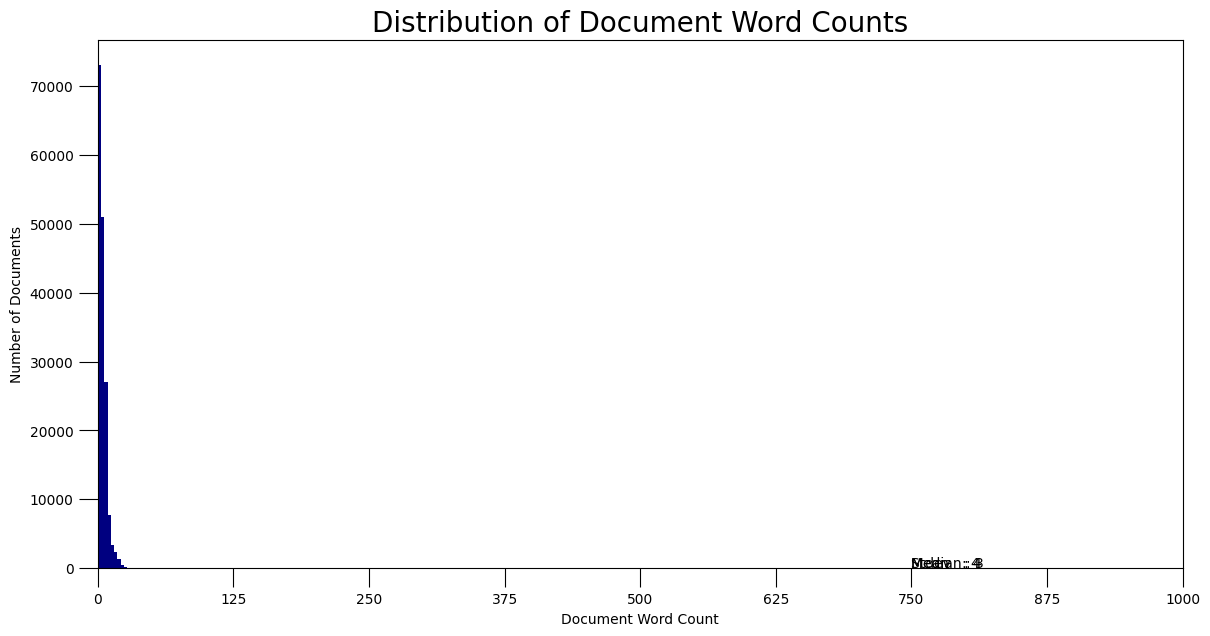

In [71]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(14,7), dpi=100)
plt.hist(doc_lens, bins = 10, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
# plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
# plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 100), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=14)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=20))
plt.show()

### 9. Distribution of Word Counts by Dominant Topic

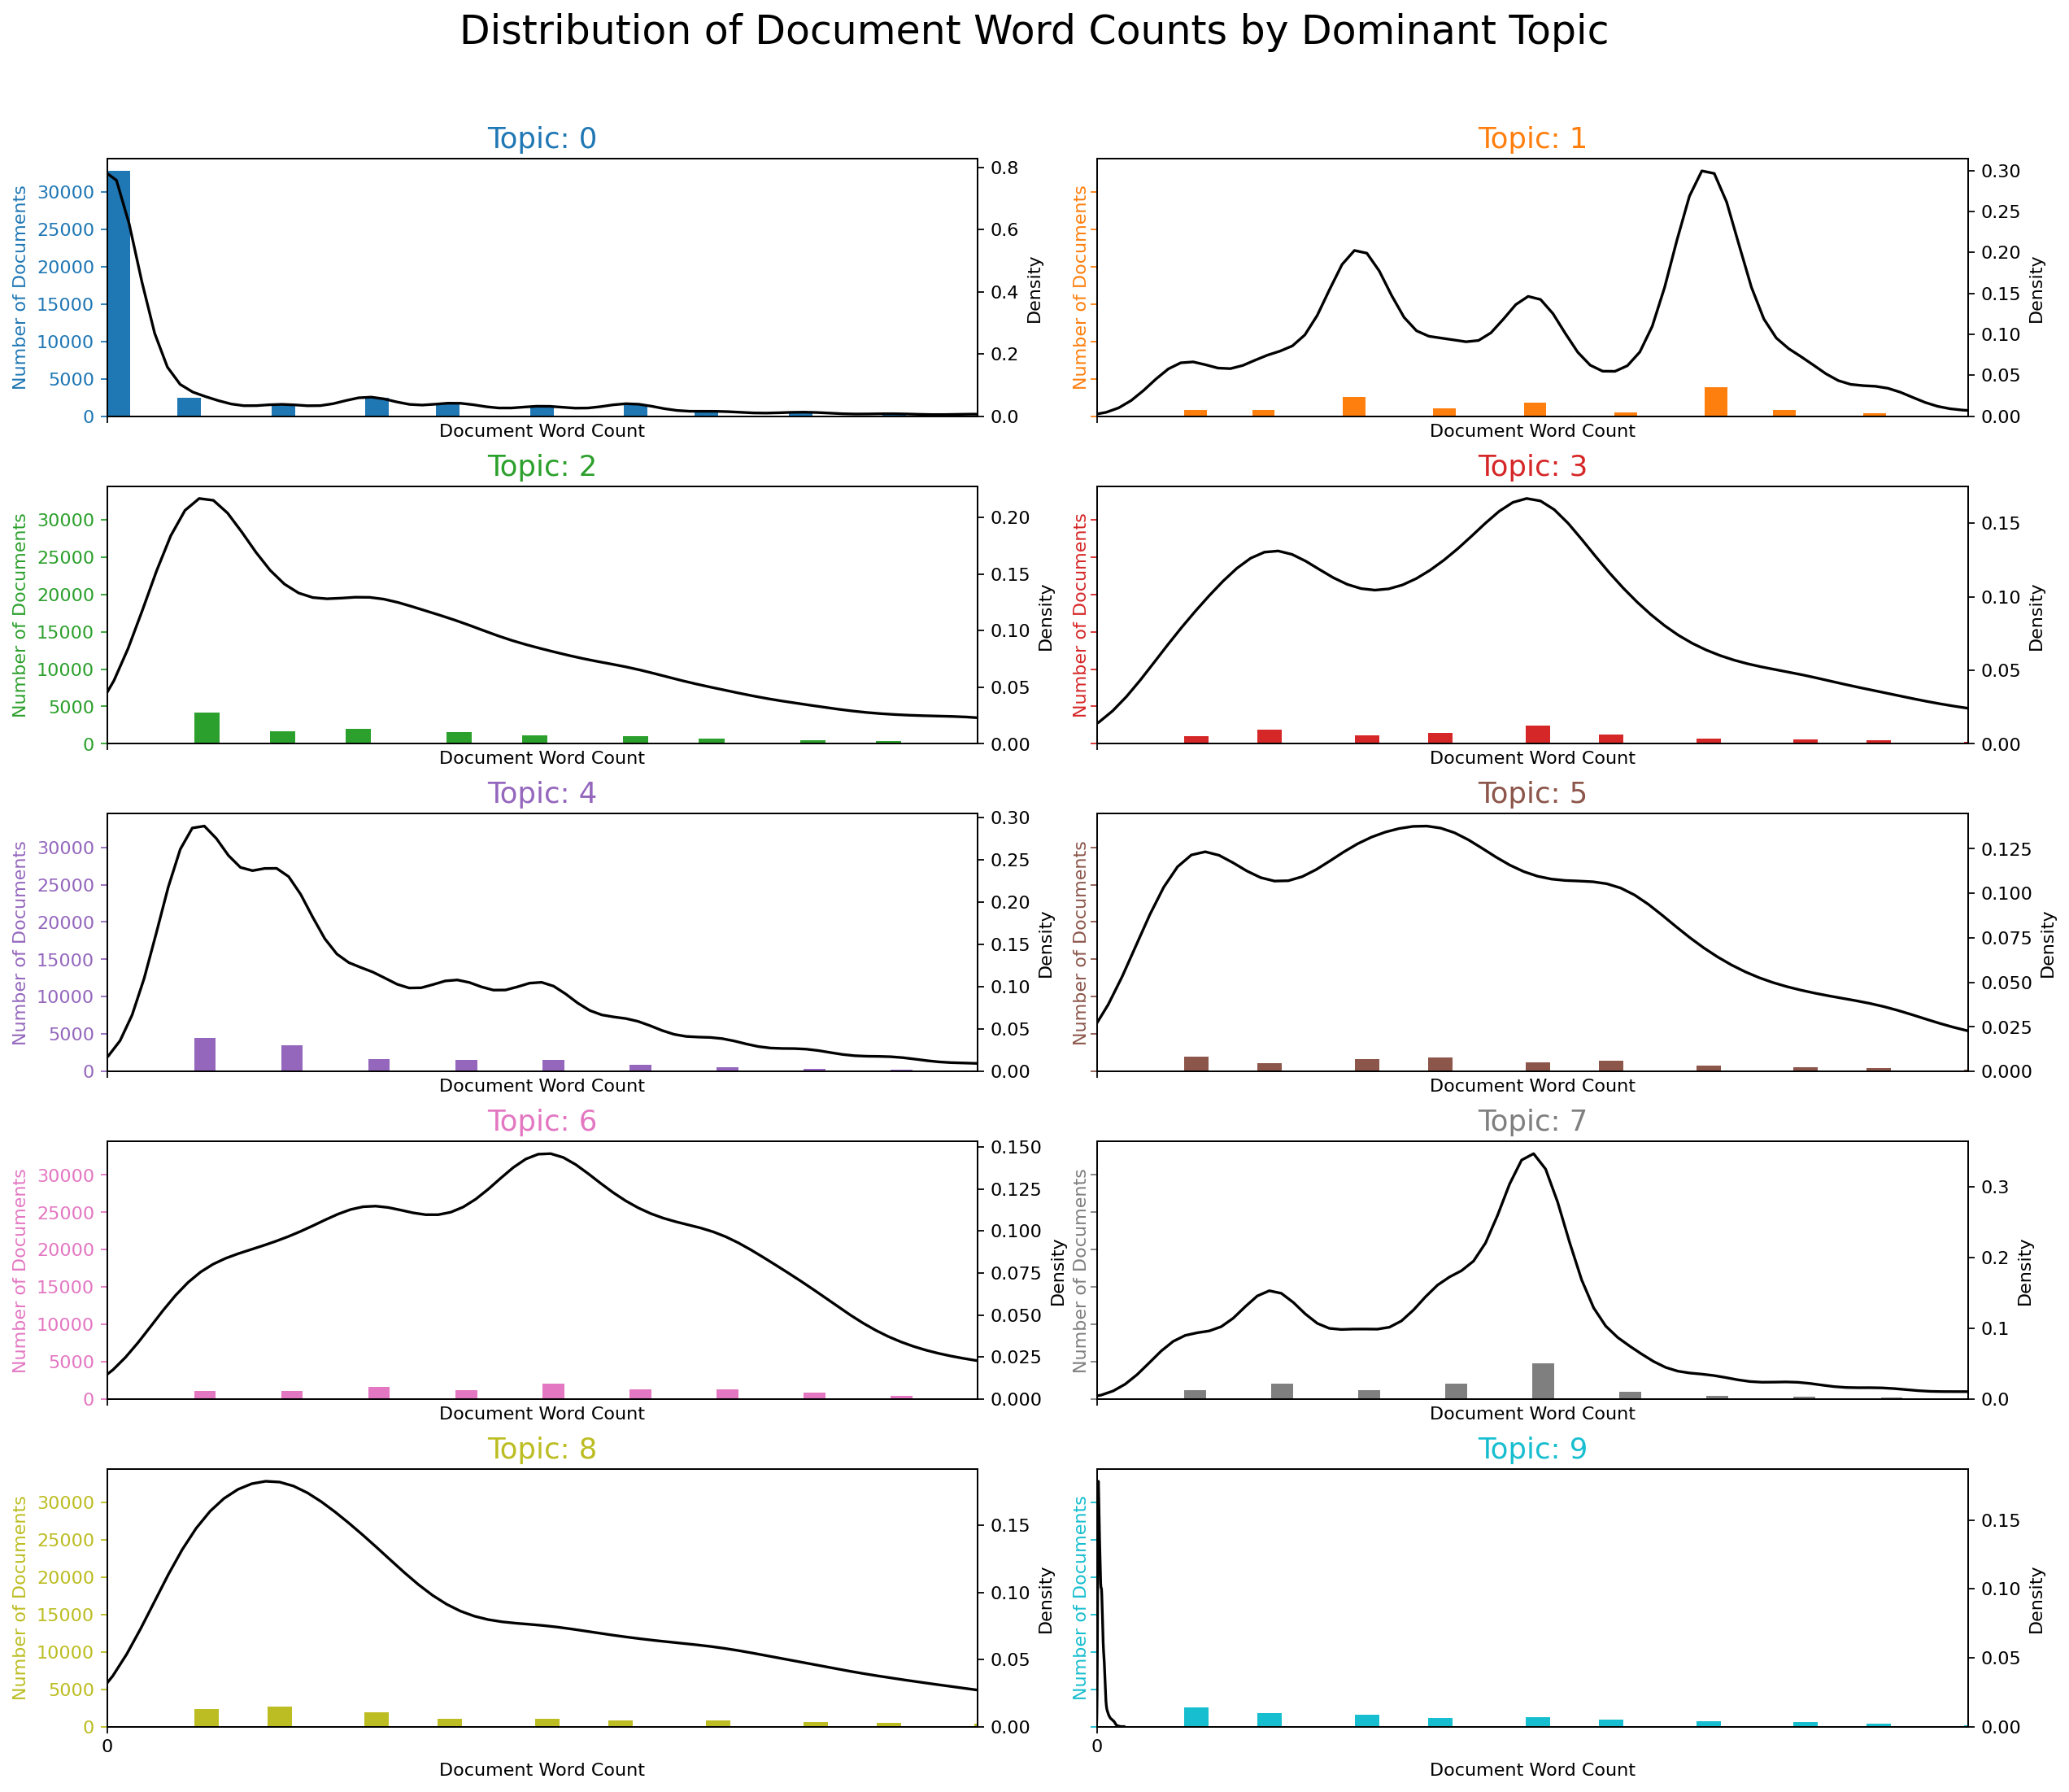

In [76]:
import seaborn as sns
import matplotlib.colors as mcolors
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(5,2,figsize=(16,14), dpi=160, sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    ax.hist(doc_lens, bins = 100, color=cols[i])
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 10), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,1000,9))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

### 10. Word Clouds of Top N Keywords in Each Topic

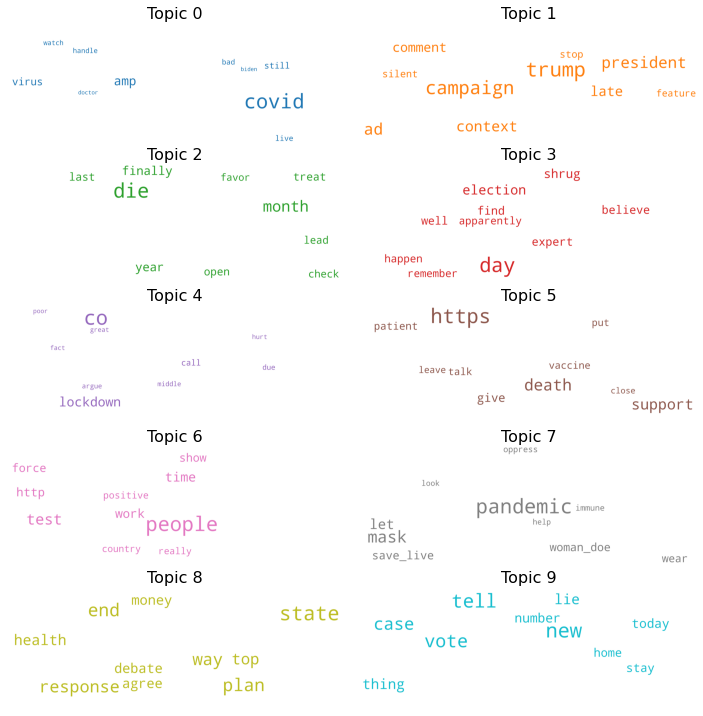

In [79]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=5000,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')

plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

### 11. Word Counts of Topic Keywords

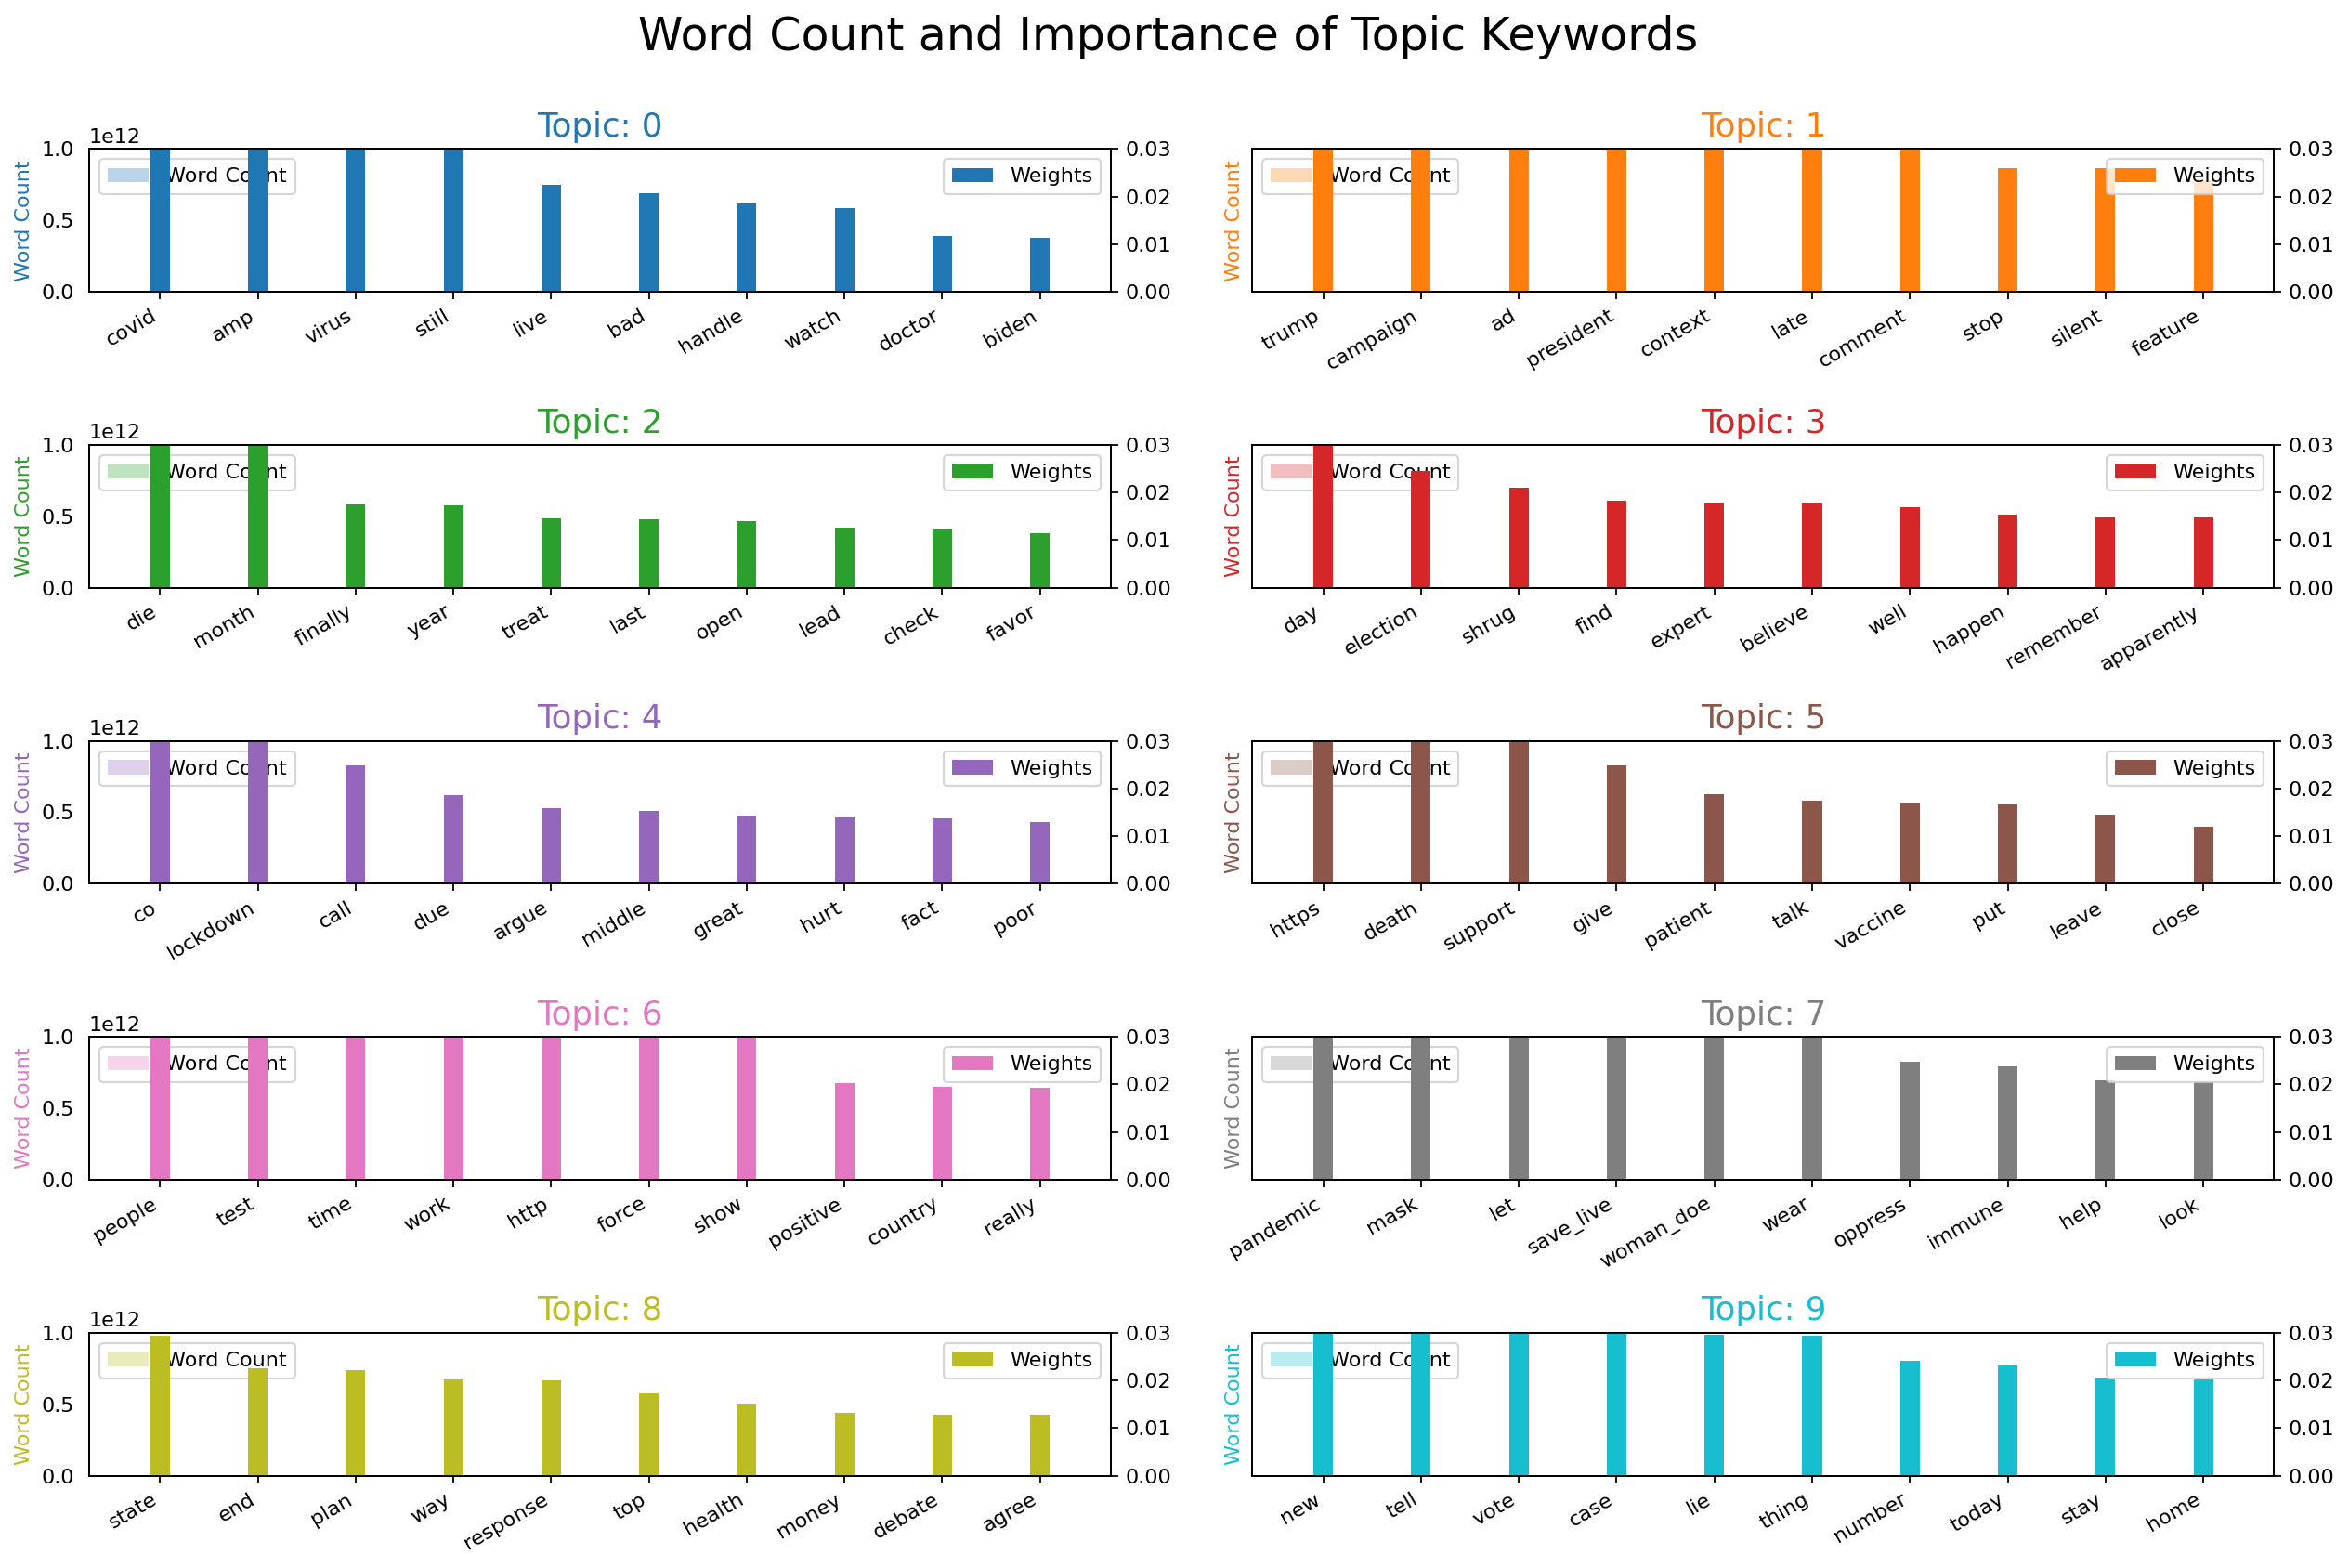

In [45]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(5, 2, figsize=(16,10), sharey=True, dpi=160)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 1000000000000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()


### 12. Sentence Chart Colored by Topic

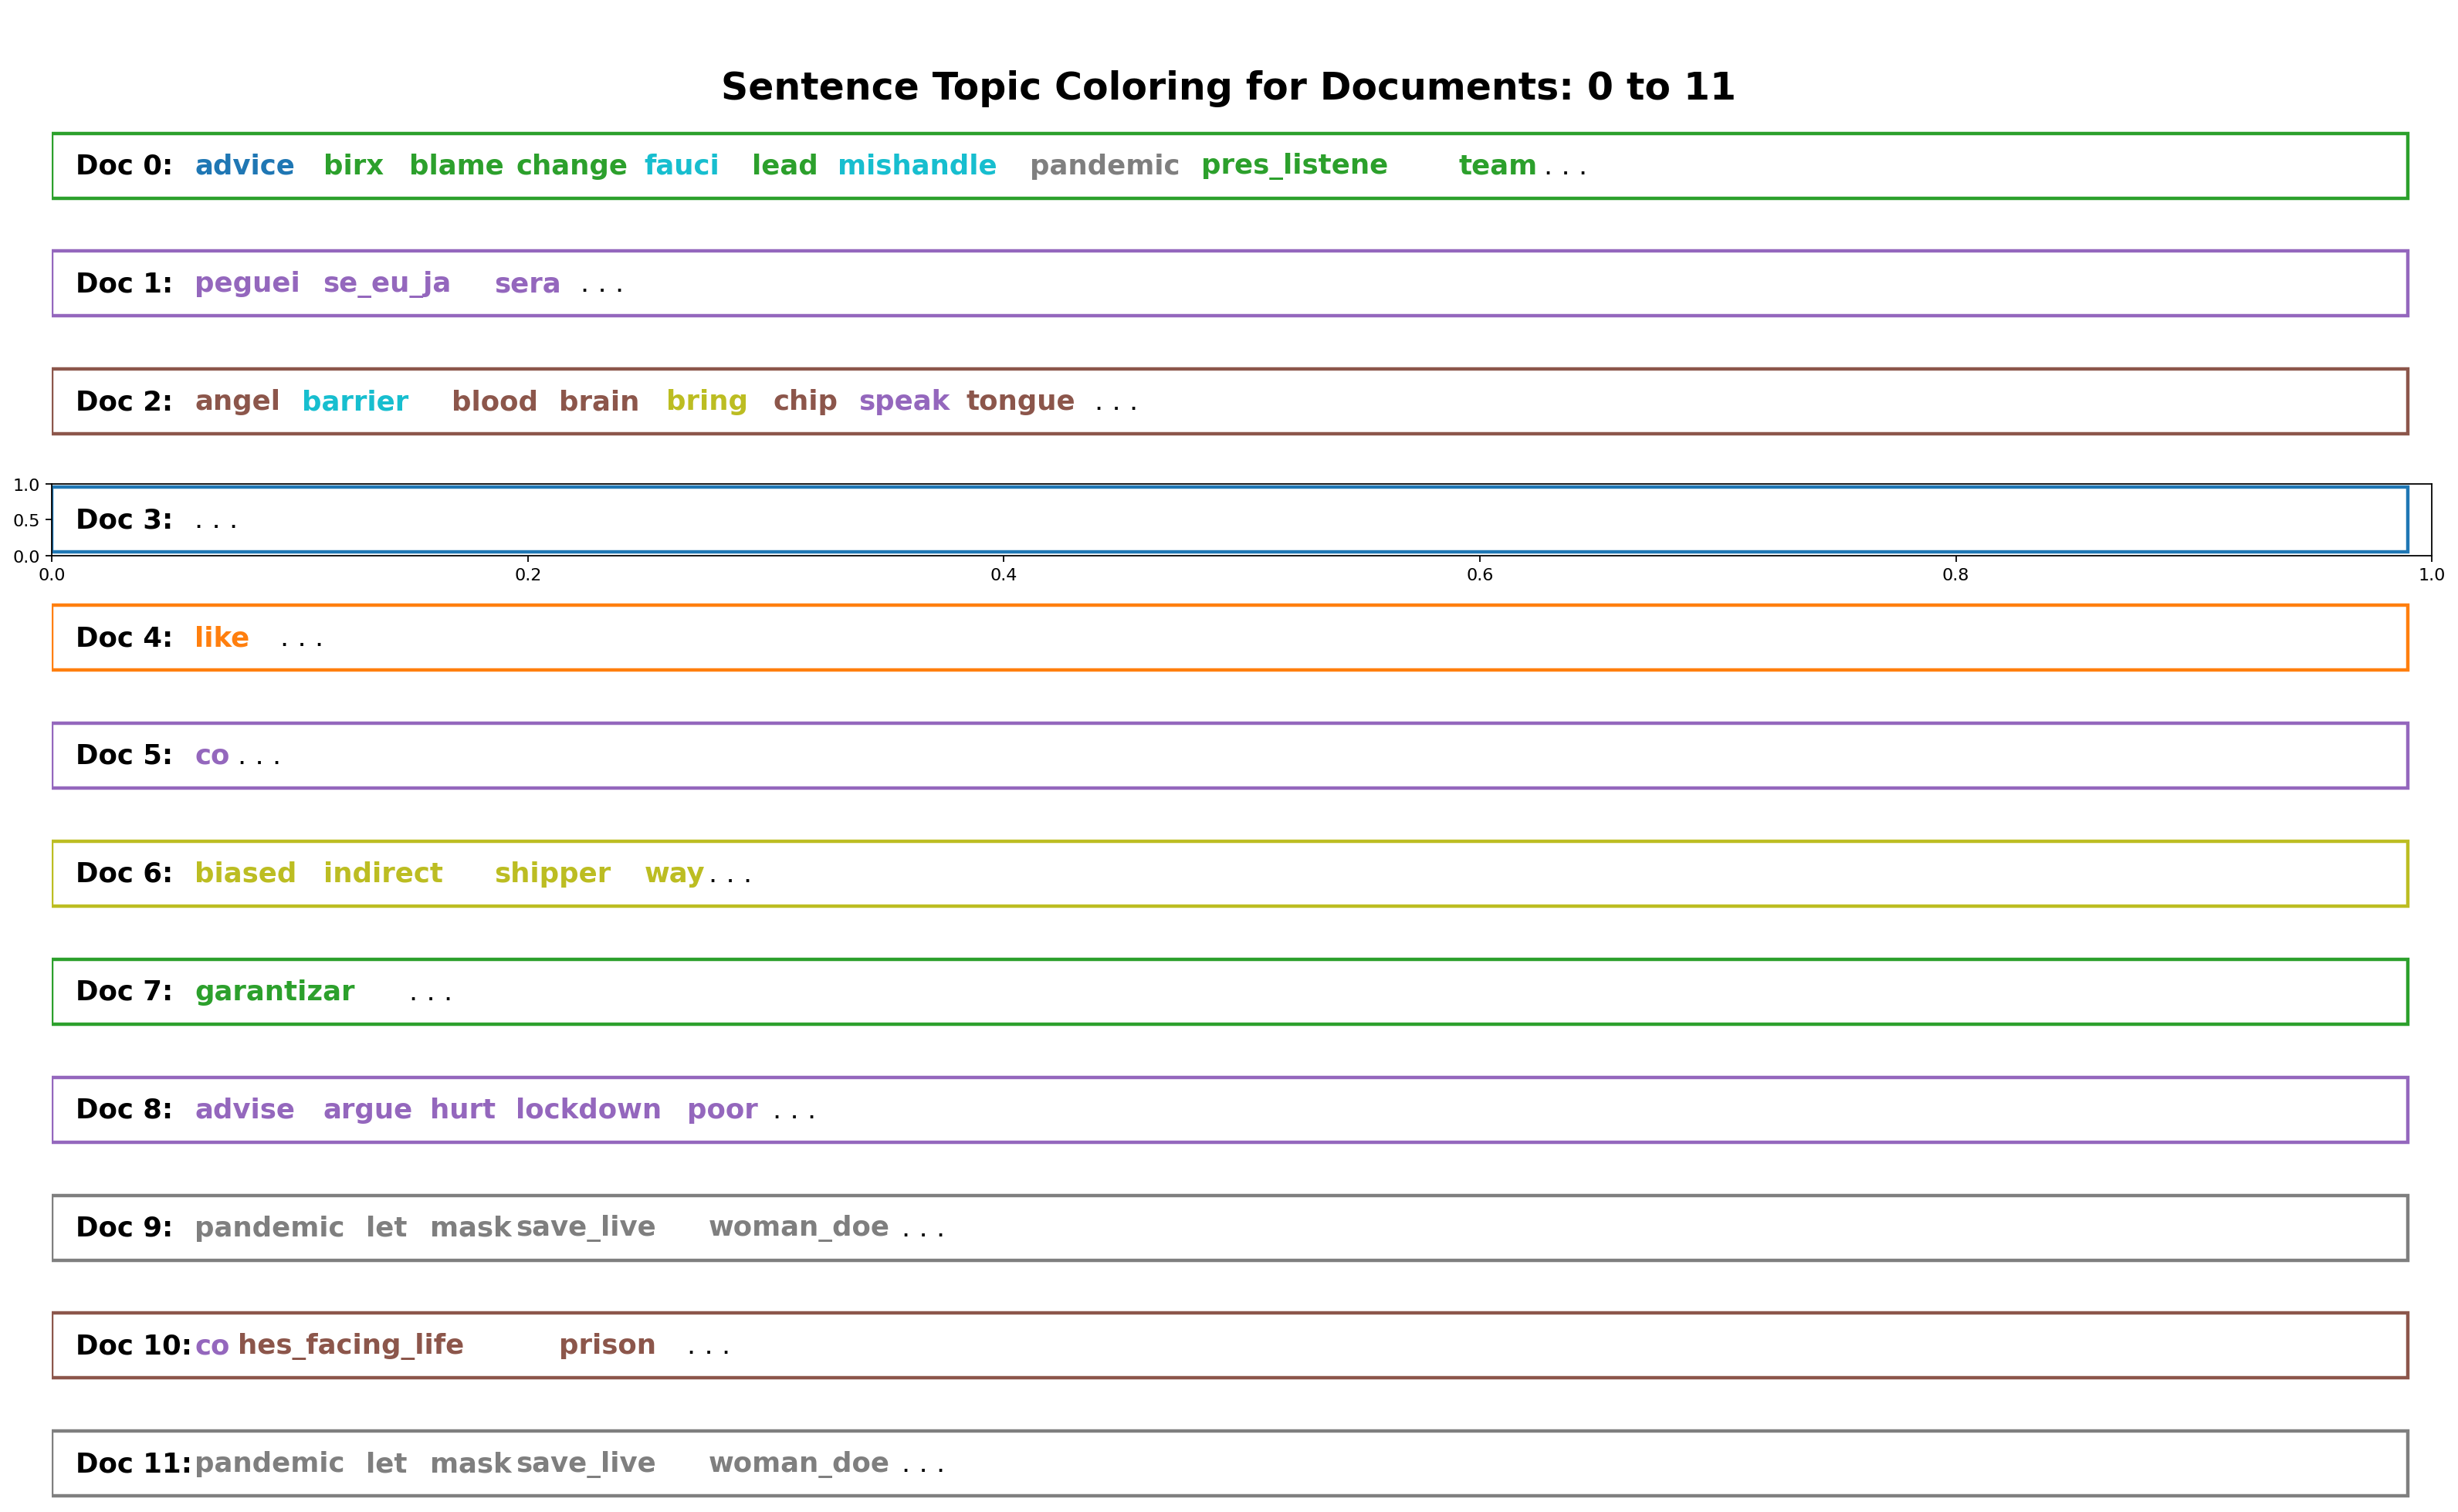

In [46]:
# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=lda_model, corpus=corpus, start = 0, end = 13):
    corp = corpus[start:end]
    mycolors = [color for name, color in mcolors.TABLEAU_COLORS.items()]

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95), dpi=160)       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart()  

### 13. What are the most discussed topics in the documents?

In [110]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

### 14. Number of Documents by Dominant Topic & Topic Weightage

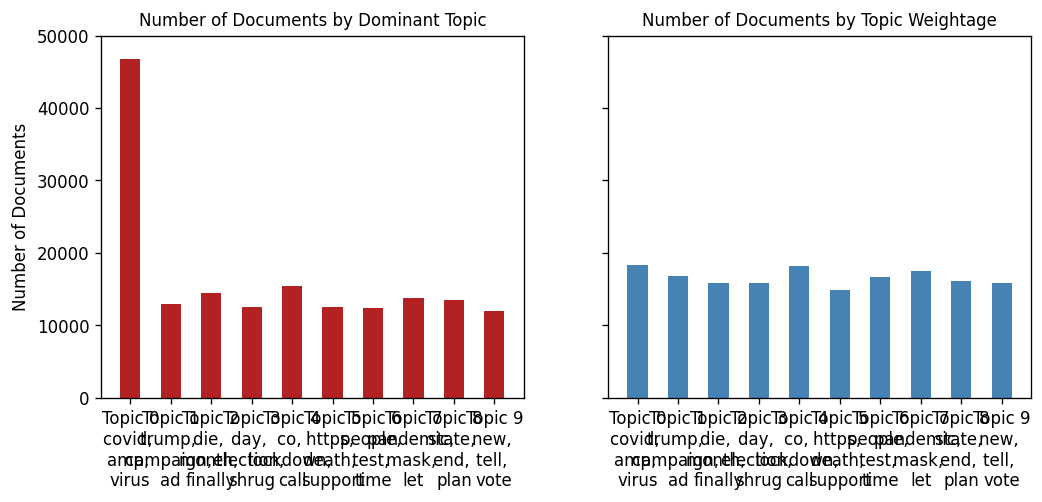

In [81]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 50000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

### 15. t-SNE Clustering Chart

In [17]:
# Get topic weights and dominant topics
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 126987 samples in 0.149s...
[t-SNE] Computed neighbors for 126987 samples in 3.564s...
[t-SNE] Computed conditional probabilities for sample 1000 / 126987
[t-SNE] Computed conditional probabilities for sample 2000 / 126987
[t-SNE] Computed conditional probabilities for sample 3000 / 126987
[t-SNE] Computed conditional probabilities for sample 4000 / 126987
[t-SNE] Computed conditional probabilities for sample 5000 / 126987
[t-SNE] Computed conditional probabilities for sample 6000 / 126987
[t-SNE] Computed conditional probabilities for sample 7000 / 126987
[t-SNE] Computed conditional probabilities for sample 8000 / 126987
[t-SNE] Computed conditional probabilities for sample 9000 / 126987
[t-SNE] Computed conditional probabilities for sample 10000 / 126987
[t-SNE] Computed conditional probabilities for sample 11000 / 126987
[t-SNE] Computed conditional probabilities for sample 12000 / 126987
[t-SNE] Computed conditional probabi

### 16. Creating the Correlation Matrix

In [93]:
tweets = pd.DataFrame(df)
def find_hashtags(tweet):
    '''This function will extract hashtags'''
    return re.findall('(#[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

# make new columns for mentioned usernames and hashtags
tweets['hashtags'] = tweets.text.apply(find_hashtags)
# tweets.head(5)

In [94]:
hashtags_list_df = df.loc[
                       df.hashtags.apply(
                           lambda hashtags_list: hashtags_list !=[]
                       ),['hashtags']]
# print(hashtags_list_df.head(10))

In [95]:
flattened_hashtags_df = pd.DataFrame(
    [hashtag for hashtags_list in hashtags_list_df.hashtags
    for hashtag in hashtags_list],
    columns=['hashtag'])
# print(flattened_hashtags_df.head(10))

In [96]:
# count of appearances of each hashtag
popular_hashtags = flattened_hashtags_df.groupby('hashtag').size()\
                                        .reset_index(name='counts')\
                                        .sort_values('counts', ascending=False)\
                                        .reset_index(drop=True)

# print(popular_hashtags.head(10))

In [104]:
import seaborn as sn
import matplotlib.pyplot as plt

min_appearance = 150
# find popular hashtags - make into python set for efficiency
popular_hashtags_set = set(popular_hashtags[
                           popular_hashtags.counts>=min_appearance
                           ]['hashtag'])

# make a new column with only the popular hashtags
hashtags_list_df['popular_hashtags'] = hashtags_list_df.hashtags.apply(
            lambda hashtag_list: [hashtag for hashtag in hashtag_list
                                  if hashtag in popular_hashtags_set])
# drop rows without popular hashtag
popular_hashtags_list_df = hashtags_list_df.loc[
            hashtags_list_df.popular_hashtags.apply(lambda hashtag_list: hashtag_list !=[])]

In [105]:
# make new dataframe
hashtag_vector_df = popular_hashtags_list_df.loc[:, ['popular_hashtags']]

for hashtag in popular_hashtags_set:
    # make columns to encode presence of hashtags
    hashtag_vector_df['{}'.format(hashtag)] = hashtag_vector_df.popular_hashtags.apply(
        lambda hashtag_list: int(hashtag in hashtag_list))

# print(hashtag_vector_df.head(10))

                              #covid19  ...   #EnVivo
#covid19                      1.000000  ... -0.027810
#EnCombateContraElCovid19    -0.034846  ... -0.025973
#lockdown                    -0.010783  ... -0.020079
#scamdemic                   -0.026938  ... -0.020079
#SARSMUSTEND                 -0.026677  ... -0.019884
#KapoldaSulsel               -0.029669  ... -0.022114
#MAGA                        -0.026414  ... -0.019688
#TaatiProkesHindariKerumunan -0.029669  ... -0.022114
#EnVideo                     -0.028519  ... -0.021257
#TyphoidMary                 -0.026215  ... -0.019539
#COVID__19                   -0.031630  ... -0.023575
#They                        -0.026808  ... -0.019981
#COvId19                     -0.034015  ... -0.025354
#OpsYustisiPoldaSulsel       -0.029669  ... -0.022114
#Trump                       -0.023669  ... -0.023784
#IndahnyaBerbagi             -0.029669  ... -0.022114
#COVID19                     -0.195866  ... -0.124857
#coronavirus                

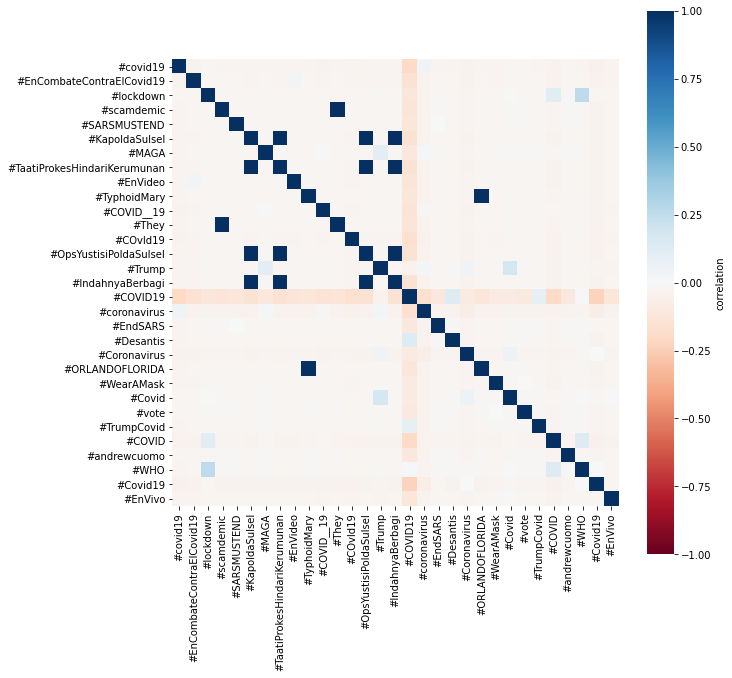

In [106]:
hashtag_matrix = hashtag_vector_df.drop('popular_hashtags', axis=1)

# calculate the correlation matrix
correlations = hashtag_matrix.corr()
print (correlations)
# plot the correlation matrix
plt.figure(figsize=(10,10))
sns.heatmap(correlations,
     cmap='RdBu',
     vmin=-1,
     vmax=1,
     square = True,
     cbar_kws={'label':'correlation'})
plt.show()

### 17. Creating the Heatmap

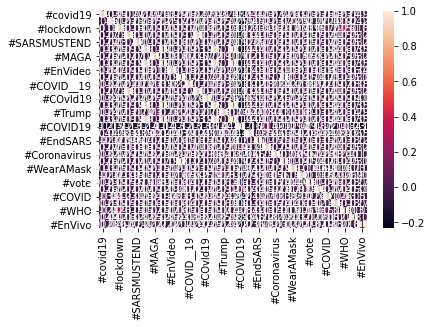

In [107]:
import seaborn as sn
import matplotlib.pyplot as plt

sn.heatmap(correlations, annot=True)
plt.show()

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords

### 18. pyLDAVis

In [82]:
pip install pyLDAvis

In [83]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

vis = gensimvis.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.066793  0.072863       1        1  11.612393
6      0.044355 -0.021989       2        1  11.051209
1     -0.429818  0.108203       3        1  10.758800
7     -0.059164 -0.425561       4        1  10.443472
3      0.068711  0.038575       5        1  10.007744
4      0.045065  0.078655       6        1   9.495516
8      0.025578  0.024322       7        1   9.440909
9      0.058246  0.017722       8        1   9.342110
5      0.091542  0.028163       9        1   9.197884
2      0.088692  0.079048      10        1   8.649962, topic_info=          Term          Freq         Total Category  logprob  loglift
22          co  18928.000000  18928.000000  Default  30.0000  30.0000
51       covid  20174.000000  20174.000000  Default  29.0000  29.0000
7     pandemic  12430.000000  12430.000000  Default  28.0000  28.0000
197      trump   8580.000000   8580.000000  Default  27.0000  27.0000
34        mask   7754.000000   7754.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
1723      drug    379.027886    379.938995  Topic10  -4.9879   2.4452
138     thread    371.771668    372.682594  Topic10  -5.0073   2.4452
3546    senior    368.877871    369.788705  Topic10  -5.0151   2.4451
212     almost    352.744320    353.655342  Topic10  -5.0598   2.4450
938      begin    351.459577    352.370727  Topic10  -5.0635   2.4450

[330 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
158       6  0.996130          action
361       3  0.999833              ad
195       3  0.998230        ad_toute
437       8  0.997316  administration
28        6  0.999159          advise
...     ...       ...             ...
2277      3  0.997639    world_leader
170      10  0.998892            year
770       6  0.997601       yesterday
1077      1  0.998324             yet
3395     10  0.998005     ในวนพรงนแลว

[300 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 7, 2, 8, 4, 5, 9, 10, 6, 3])

### 19. Evaluate LDA

In [109]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
# a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_ready, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -8.5126303758365

Coherence Score:  0.3626744430421453
